In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


In [2]:
df = pd.read_csv('../input/wine-quality-dataset/WineQT.csv')

<h1>Preliminary exploration</h1>

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


<h2>Summary statistics</h2>

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


<h2>Indexing</h2>

In [7]:
df.index

RangeIndex(start=0, stop=1143, step=1)

In [8]:
df['Id'].is_unique

True

In [9]:
df.set_index('Id', inplace=True)

<h3>Appearance with new index</h3>

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<h1>Some preliminary observations</h1>
<li>No column seems useless for our analysis so far and so we are not going to drop any</li>
<li>The *wine quality* variable seems to be the <b>target variable</b> while the rest are the <b>feature variables</b></li>

<h1>Visualization</h1>

In [11]:
#visualization

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

<h2>Distribution of the target variable wine quality</h2>

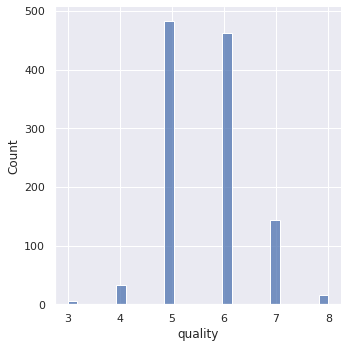

In [12]:
sns.displot(data=df, x='quality')
plt.show()

<h3>Observation:</h3>
<li>We see that wine quality 5 and 6 are our most popular outcomes</li>

<h2>Search for strongest feature variables</h2>

In [13]:
#We will use seaborn's heatmap function for this
tc = df.corr()

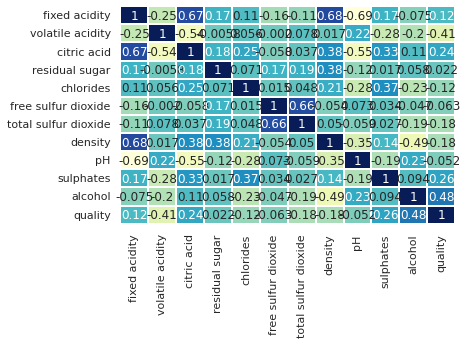

In [14]:
sns.heatmap(tc, annot=True, cbar=False, linewidth=1.5, cmap='YlGnBu')
plt.show()

<h3>Observation:</h3>
<h4>We see that the strongest feature variables are:</h4>
<li>*alcohol*,</li> <li>*sulphates*,</li> <li>*citric acid*,</li> <li>*volatile acidity*</li>

<h2>We drop the weak feature variables</h2>

In [15]:
df.drop(['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH'], axis=1, inplace=True)
df.head()

,volatile acidity,citric acid,total sulfur dioxide,sulphates,alcohol,quality
Id,,,,,,
0,0.70,0.00,34.0,0.56,9.4,5
1,0.88,0.00,67.0,0.68,9.8,5
2,0.76,0.04,54.0,0.65,9.8,5
3,0.28,0.56,60.0,0.58,9.8,6
4,0.70,0.00,34.0,0.56,9.4,5


<h2>conditional relationships for each , one by one</h2>

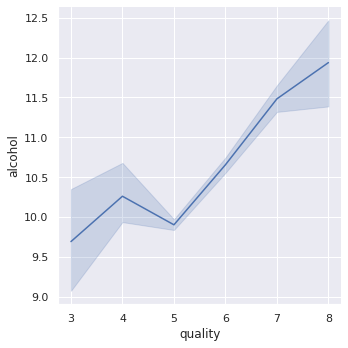

In [16]:
sns.relplot(x='quality', y='alcohol', data=df, kind='line')

<h3>Observation</h3>
<li>We see that quality varies directly with alcohol content</li>

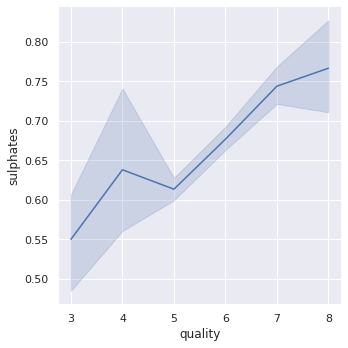

In [17]:
sns.relplot(x='quality', y='sulphates', data=df, kind='line')

<h3>Observation</h3>
<li>We see that wine quality varies somewhat directly with sulphates</li>

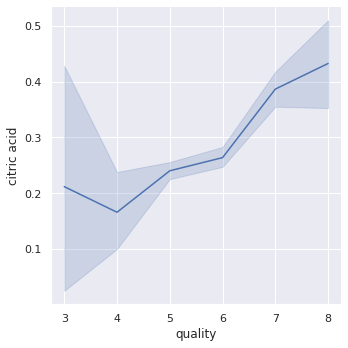

In [18]:
sns.relplot(x='quality', y='citric acid', data=df, kind='line')

<h3>Observation</h3>
<li>We also see that quality varies somewhat directly with citric acid</li>

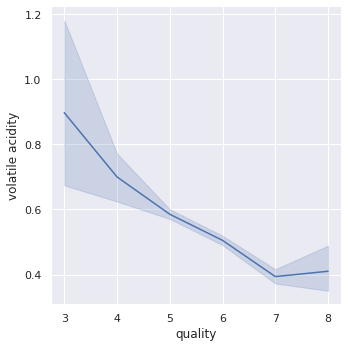

In [19]:
sns.relplot(x='quality', y='volatile acidity', data=df, kind='line')

<h3>Observation</h3>
<li>We also see that quality varies inversely with volatile acidity</li>